In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from kuramoto import *
from utils import * 


Bad key "text.kerning_factor" on line 4 in
/Users/yutingli/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.2/matplotlibrc.template
or from the matplotlib source distribution


## Simulate for various parameters and collect the data

In [2]:
# Set up model parameters 
epsilon = 1
gamma = 0.07
sigma = 0.5
mean_omega = 1 

# Set up simulation parameters 
L = 256 # size of the system 
T = 1e3 # total time of the simulation 
dt = 1e-2 # time step 
n_batches = T # number of time points recorded in the end 
N = 10

# Breakpoints for phases 
breakpoints = [x*2*np.pi for x in [0.47, 0.67]]

# Initialise the model and run the simulation 
sigmas = [0.5, 0.1, 1]
data = [] 
for sigma in sigmas: 
    print(sigma)
    datasets = [] 
    data.append(datasets)
    for n in range(N):
        model = Kuramoto(epsilon, gamma, sigma, mean_omega, BC='fixed')
        model.initialise(L, T, dt, n_batches)
        model.evolve(verbose=False)
        datasets.append(collect_dataset(model.res[-2] % 2*np.pi, breakpoints))  

0.5
0.1
1


## Find the defects and collect lengths w and w/o defects 

2.2908067542213884
1.4344262295081966
1.695744680851064
3.8548387096774195
1.8285714285714285
2.7068403908794787
2.1914893617021276
1.3013333333333332
1.609375


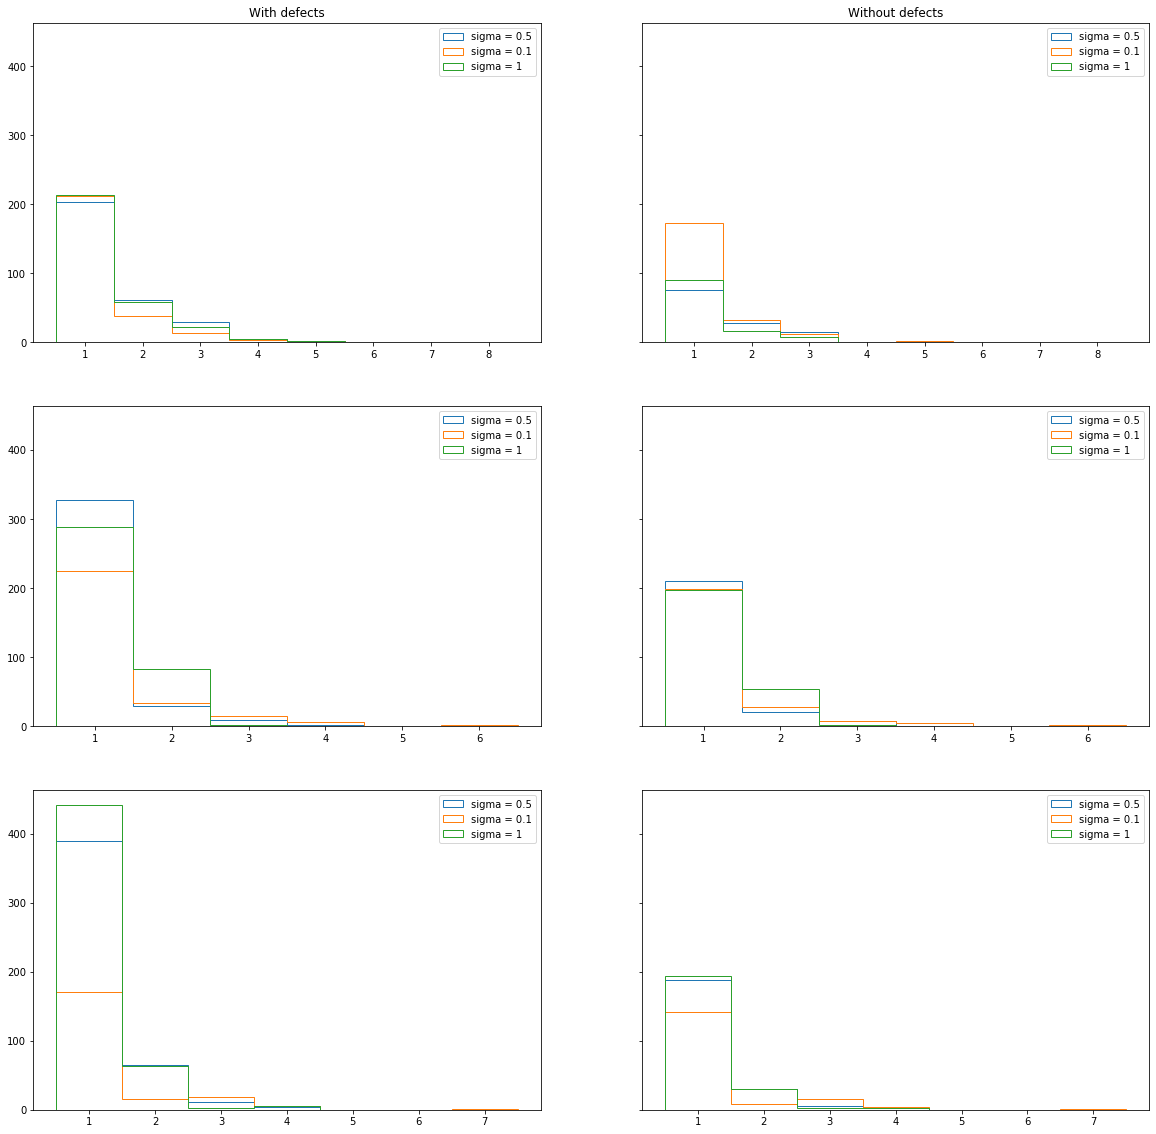

In [6]:
fig, axes = plt.subplots(ncols=2, nrows=3, sharey=True, figsize=(20, 20))

for (j, datasets) in enumerate(data): 
    find_defects(datasets) 
    lengths, lengths_wo_defects = find_lengths(datasets) 
        
    for i in range(3): 
        m = np.mean(lengths[i])
        print(m)
        lengths[i] = np.array(lengths[i])/m
        lengths_wo_defects[i] = np.array(lengths_wo_defects[i])/m
        bins = np.arange(max(lengths[i]))+0.5
        axes[i, 0].hist(lengths[i], log=False, histtype='step', bins=bins, label='sigma = {}'.format(sigmas[j]))
        axes[i, 1].hist(lengths_wo_defects[i], log=False, histtype='step', bins=bins, label='sigma = {}'.format(sigmas[j]))
    

for i in range(3): 
    for j in range(2): 
        axes[i, j].legend() 

axes[0, 0].set_title('With defects')
axes[0, 1].set_title('Without defects')

plt.show() 

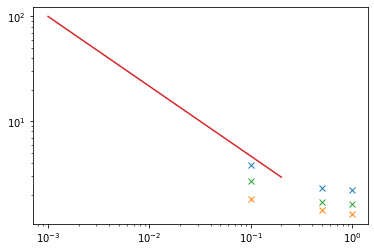

In [4]:
length_mean = []

for (j, datasets) in enumerate(data): 
    find_defects(datasets) 
    lengths, lengths_wo_defects = find_lengths(datasets) 
    length_mean.append(list(map(np.mean, lengths)))
    
    
x = np.arange(0.001, 0.2, 0.001)
plt.plot(sigmas, length_mean, 'x')
plt.plot(x, x**(-2/3))
plt.xscale('log')
plt.yscale('log')
plt.show() 

## Run smaller simulations but scan more params 

In [8]:
gammas = [0.1, 0.2, 0.5, 1, 1.5, 2, 5]
sigmas = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3] 
mean_omegas = [0.3, 0.5, 1, 2, 3, 10]
N = 5 

data = [] 
for gamma in gammas: 
    for sigma in sigmas: 
        for mean_omega in mean_omegas: 
            datasets = [] 
            data.append(datasets)
            for n in range(N):
                model = Kuramoto(epsilon, gamma, sigma, mean_omega, BC='fixed')
                model.initialise(L, T, dt, n_batches)
                model.evolve(verbose=False)
                datasets.append(collect_dataset(model.res[-2] % 2*np.pi, breakpoints))  

In [ ]:
s = len(data) 


length_mean = []
length_std = []
length2_mean = []
length2_std = [] 

for (j, datasets) in enumerate(data): 
    find_defects(datasets) 
    lengths, lengths_wo_defects = find_lengths(datasets) 
    

    
    length_mean.append(list(map(np.mean, lengths)))
    length_std.append(list(map(np.std, lengths)))
    
    length2_mean.append(list(map(np.mean, lengths_wo_defects)))
    length2_std.append(list(map(np.std, lengths_wo_defects)))
    
    
        
shape = (len(gammas),len(sigmas), len(mean_omegas), 3)
length_mean = np.reshape(length_mean, shape)
length_std = np.reshape(length_std, shape)
length2_mean = np.reshape(length2_mean, shape) 
length2_std = np.reshape(length2_std, shape)

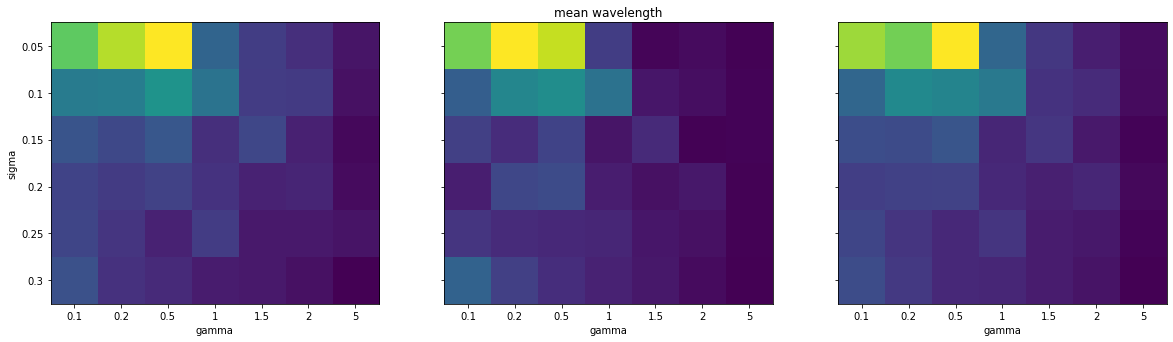

In [9]:
fig, axes = plt.subplots(ncols=3, sharey=True, figsize=(20, 20))

for i in range(3): 

    axes[i].imshow(length2_mean[:, :, 0, i].T) # swap x and y axis so gammas is the x axis 
    axes[i].set_xticks(range(len(gammas)))
    axes[i].set_xticklabels(gammas)
    axes[i].set_xlabel('gamma')

axes[0].set_ylabel('sigma')
axes[0].set_yticks(range(len(sigmas)))
axes[0].set_yticklabels(sigmas) 
axes[1].set_title('mean wavelength')
plt.show() 

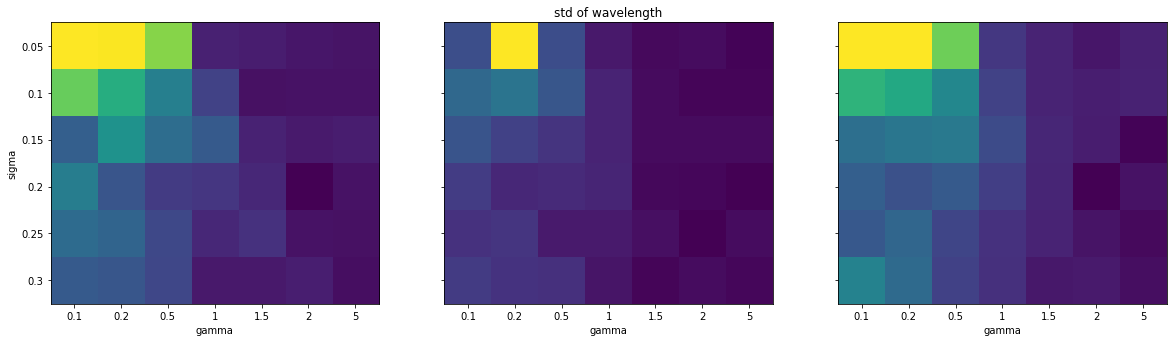

In [10]:
fig, axes = plt.subplots(ncols=3, sharey=True, figsize=(20, 20))

for i in range(3): 

    axes[i].imshow(length2_std[:, :, 1, i].T)
    axes[i].set_xticks(range(len(gammas)))
    axes[i].set_xticklabels(gammas)
    axes[i].set_xlabel('gamma')

axes[0].set_ylabel('sigma')
axes[0].set_yticks(range(len(sigmas)))
axes[0].set_yticklabels(sigmas) 
axes[1].set_title('std of wavelength')
plt.show() 